In [1]:
import os
import sys
import glob
import keras
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.optimizers import SGD
import tensorflow
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
keras.__version__

'1.2.2'

In [3]:
tensorflow.__version__

'0.12.0'

In [4]:
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

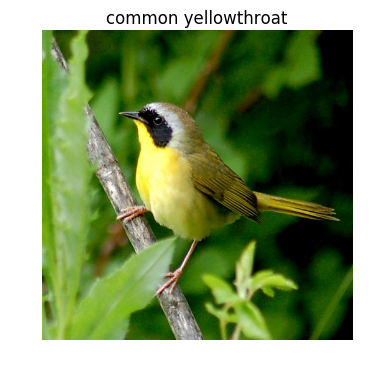

In [5]:
img = load_img('data/train/common_yellowthroat/Common_Yellowthroat_0004_272622598.jpg')
plt.imshow(img)
plt.axis('off')
plt.title('Common Yellowthroat')
plt.show()

In [6]:
x = img_to_array(img)
x2 = x.reshape((1,) + x.shape)

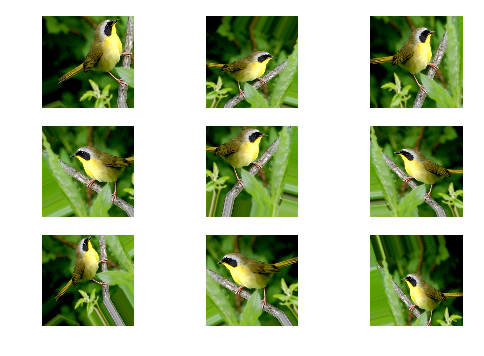

In [7]:
i = 0
fig = plt.figure()
plt.title('Pre-processed')
for batch in datagen.flow(x2, batch_size = 1):
    i += 1
    if i > 9:
        break
    temp = batch.reshape(x.shape)
    plt.subplot(3, 3, i)
    plt.imshow(temp.astype('uint8'))
    plt.axis('off')
plt.show()

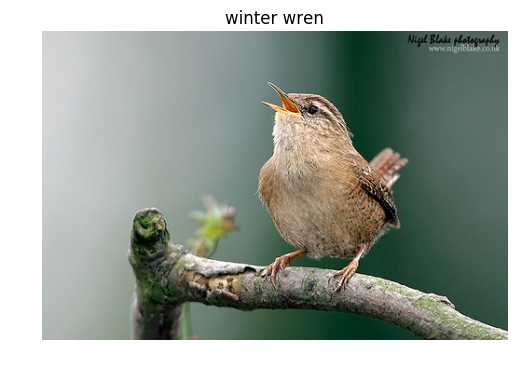

In [8]:
img = load_img('data/train/winter_wren/Winter_Wren_0025_2703419796.jpg')
plt.imshow(img)
plt.axis('off')
plt.title('Winter Wren')
plt.show()

In [ ]:
img = load_img('data/train/Black_footed_Albatross/Black_footed_Albatross_0002_2293084168.jpg')
plt.imshow(img)
plt.axis('off')
plt.title('Black footed Albatross')
plt.show()

In [ ]:
img = load_img('data/train/Brown_Pelican/Brown_Pelican_0018_393296370.jpg')
plt.imshow(img)
plt.axis('off')
plt.title('Brown Pelican')
plt.show()

In [ ]:
img = load_img('data/train/Eared_Grebe/Eared_Grebe_0024_1876616311.jpg')
plt.imshow(img)
plt.axis('off')
plt.title('Eared Grebe')
plt.show()

In [ ]:
img = load_img('data/train/Green_Jay/Green_JayGreen_Jay_0030_649594018.jpg')
plt.imshow(img)
plt.axis('off')
plt.title('Green Jay')
plt.show()

In [ ]:
img = load_img('data/train/Lincoln_Sparrow/Lincoln_Sparrow_0011_83727226.jpg')
plt.imshow(img)
plt.axis('off')
plt.title('Lincoln Sparrow')
plt.show()

In [ ]:
img = load_img('data/train/Pelagic_Cormorant/Pelagic_Cormorant_0028_327884826.jpg')
plt.imshow(img)
plt.axis('off')
plt.title('Pelagic Cormorant')
plt.show()

In [ ]:
img = load_img('data/train/Pine_Warbler/Pine_Warbler_0004_490710882.jpg')
plt.imshow(img)
plt.axis('off')
plt.title('Pine Warbler')
plt.show()

In [ ]:
img = load_img('data/train/Sage_Thrasher/Sage_Thrasher_0012_1343979675.jpg')
plt.imshow(img)
plt.axis('off')
plt.title('Sage Thrasher')
plt.show()

In [9]:
# default settings
img_width, img_height = 299, 299

train_dir = 'data/train'
validate_dir = 'data/validate'
nb_epochs = 10
batch_size = 128
nb_classes = len(glob.glob(train_dir + '/*'))

In [10]:
# get number of images in training directory
nb_train_samples = 0
for r, dirs, files in os.walk(train_dir):
    for dr in dirs:
        nb_train_samples += len(glob.glob(os.path.join(r, dr + "/*")))
print(nb_train_samples)

149


In [11]:
# get number of images in validation directory
nb_validate_samples = 0
for r, dirs, files in os.walk(validate_dir):
    for dr in dirs:
        nb_validate_samples += len(glob.glob(os.path.join(r, dr + "/*")))
print(nb_validate_samples)

168


In [12]:
# data pre-processing for training
train_datagen =  ImageDataGenerator(
      preprocessing_function=preprocess_input,
      rotation_range=30,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True)

In [13]:
# data pre-processing for validation
validate_datagen =  ImageDataGenerator(
      preprocessing_function=preprocess_input,
      rotation_range=30,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True)

In [14]:
# generate and store training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size)

Found 149 images belonging to 10 classes.


In [15]:
# generate and store validation data
validate_generator = validate_datagen.flow_from_directory(
    validate_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size)

Found 168 images belonging to 10 classes.


In [16]:
# set up transfer learning on pre-trained ImageNet Inception_V3 model - remove fully connected layer and replace
# with softmax for classifying 10 classes
incepV3_model = InceptionV3(weights = 'imagenet', include_top = False)
x = incepV3_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(nb_classes, activation = 'softmax')(x)
model = Model(input = incepV3_model.input, output = predictions)

In [17]:
for layer in incepV3_model.layers:
    layer.trainable = False
    model.compile(
        optimizer = 'rmsprop',
        loss = 'categorical_crossentropy',
        metrics = ['accuracy'])

In [18]:
transfer_learning_history = model.fit_generator(
    train_generator,
    nb_epoch = nb_epochs,
    samples_per_epoch = nb_train_samples,
    validation_data = validate_generator,
    nb_val_samples = nb_validate_samples,
    class_weight='auto')

Epoch 1/10
149/149 [==============================] - 158s - loss: 2.2410 - acc: 0.1611 - val_loss: 1.6380 - val_acc: 0.5476
Epoch 2/10
149/149 [==============================] - 146s - loss: 0.6930 - acc: 0.7383 - val_loss: 0.8852 - val_acc: 0.7024
Epoch 3/10
149/149 [==============================] - 148s - loss: 0.2489 - acc: 0.9128 - val_loss: 0.5743 - val_acc: 0.7917
Epoch 4/10
149/149 [==============================] - 144s - loss: 0.1610 - acc: 0.9530 - val_loss: 0.6310 - val_acc: 0.7857
Epoch 5/10
149/149 [==============================] - 143s - loss: 0.1660 - acc: 0.9396 - val_loss: 0.4257 - val_acc: 0.8631
Epoch 6/10
149/149 [==============================] - 145s - loss: 0.0749 - acc: 0.9933 - val_loss: 0.3515 - val_acc: 0.8810
Epoch 7/10
149/149 [==============================] - 145s - loss: 0.0642 - acc: 0.9933 - val_loss: 0.6461 - val_acc: 0.7619
Epoch 8/10
149/149 [==============================] - 142s - loss: 0.0965 - acc: 0.9732 - val_loss: 0.4544 - val_acc: 0.8512


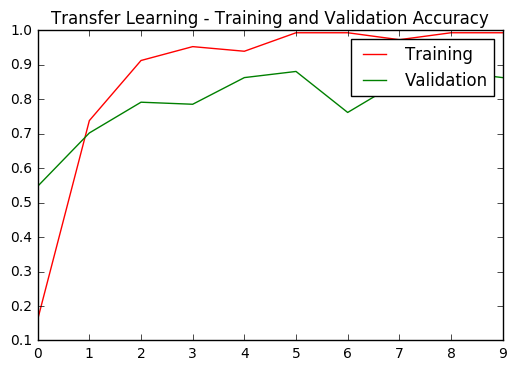

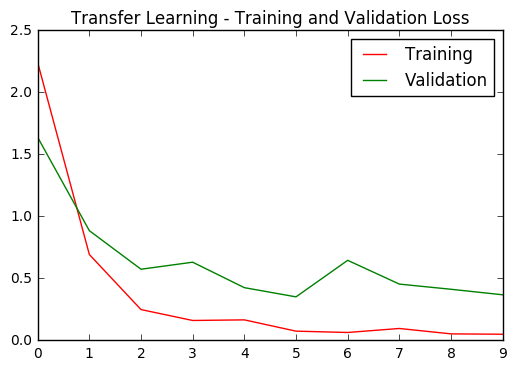

In [19]:
xfer_acc = transfer_learning_history.history['acc']
val_acc = transfer_learning_history.history['val_acc']
xfer_loss = transfer_learning_history.history['loss']
val_loss = transfer_learning_history.history['val_loss']
epochs = range(len(xfer_acc))

plt.plot(epochs, xfer_acc, 'r-', label = 'Training')
plt.plot(epochs, val_acc, 'g-', label = 'Validation')
plt.title('Transfer Learning - Training and Validation Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, xfer_loss, 'r-', label = 'Training')
plt.plot(epochs, val_loss, 'g-', label = 'Validation')
plt.title('Transfer Learning - Training and Validation Loss')
plt.legend()
plt.show()

In [20]:
for i, layer in enumerate(incepV3_model.layers):
   print(i, layer.name)

0 input_1
1 convolution2d_1
2 batchnormalization_1
3 convolution2d_2
4 batchnormalization_2
5 convolution2d_3
6 batchnormalization_3
7 maxpooling2d_1
8 convolution2d_4
9 batchnormalization_4
10 convolution2d_5
11 batchnormalization_5
12 maxpooling2d_2
13 convolution2d_9
14 batchnormalization_9
15 convolution2d_7
16 convolution2d_10
17 batchnormalization_7
18 batchnormalization_10
19 averagepooling2d_1
20 convolution2d_6
21 convolution2d_8
22 convolution2d_11
23 convolution2d_12
24 batchnormalization_6
25 batchnormalization_8
26 batchnormalization_11
27 batchnormalization_12
28 mixed0
29 convolution2d_16
30 batchnormalization_16
31 convolution2d_14
32 convolution2d_17
33 batchnormalization_14
34 batchnormalization_17
35 averagepooling2d_2
36 convolution2d_13
37 convolution2d_15
38 convolution2d_18
39 convolution2d_19
40 batchnormalization_13
41 batchnormalization_15
42 batchnormalization_18
43 batchnormalization_19
44 mixed1
45 convolution2d_23
46 batchnormalization_23
47 convolution2d_

In [26]:
# set up fine tuning on pre-trained ImageNet Inception_V3 model - train upper 172 layers only
for layer in model.layers[:2]:
    layer.trainable = False
for layer in model.layers[2:]:
    layer.trainable = True
model.compile(optimizer = SGD(
    lr = 0.01, momentum=0.9), 
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

In [27]:
fine_tuning_history = model.fit_generator(
    train_generator,
    nb_epoch = nb_epochs,
    samples_per_epoch = nb_train_samples,
    validation_data = validate_generator,
    nb_val_samples = nb_validate_samples,
    class_weight='auto')

Epoch 1/10
149/149 [==============================] - 321s - loss: 0.0389 - acc: 0.9933 - val_loss: 0.3607 - val_acc: 0.8690
Epoch 2/10


KeyboardInterrupt: 

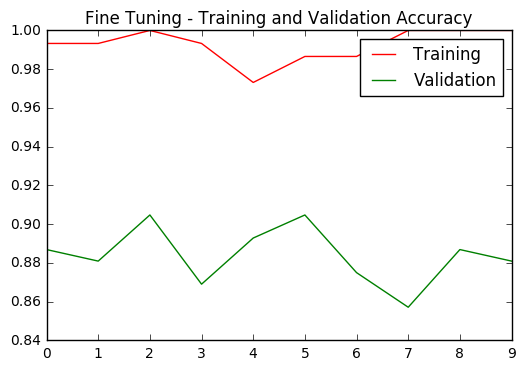

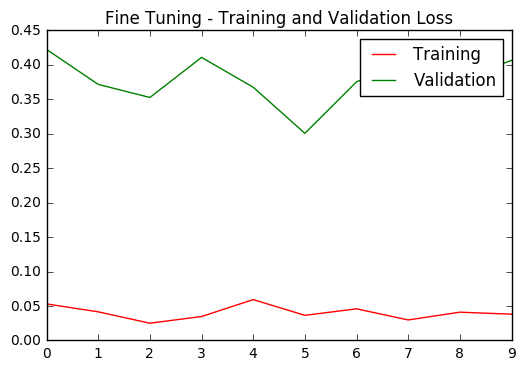

In [23]:
ft_acc = fine_tuning_history.history['acc']
val_acc = fine_tuning_history.history['val_acc']
ft_loss = fine_tuning_history.history['loss']
val_loss = fine_tuning_history.history['val_loss']
epochs = range(len(ft_acc))

plt.plot(epochs, ft_acc, 'r-', label = 'Training')
plt.plot(epochs, val_acc, 'g-', label = 'Validation')
plt.title('Fine Tuning - Training and Validation Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, ft_loss, 'r-', label = 'Training')
plt.plot(epochs, val_loss, 'g-', label = 'Validation')
plt.title('Fine Tuning - Training and Validation Loss')
plt.legend()
plt.show()